 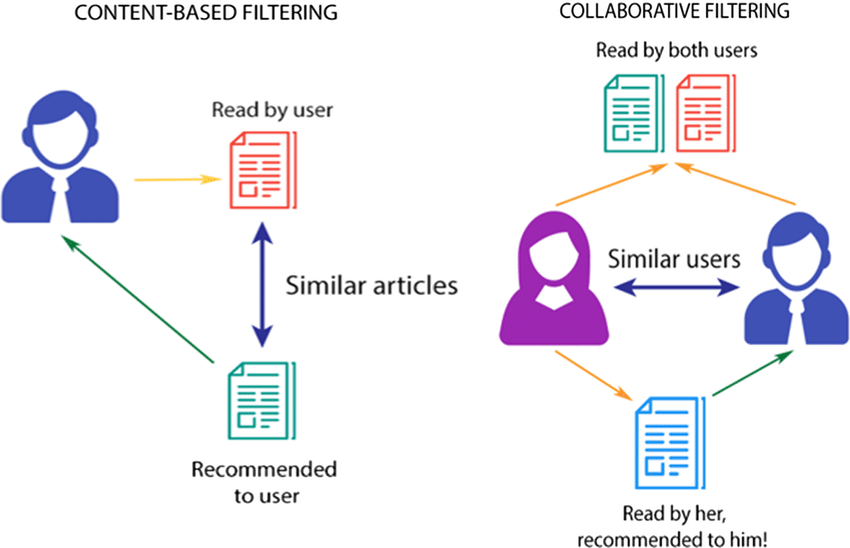

# Collaboratie Filtering Approach

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
data  = pd.read_csv('/content/data.csv')
data.drop_duplicates()

In [ ]:
data['customer_id']=data['customer_id'].astype(int)

data

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data
train_data, test_data = train_test_split(ds, test_size=0.2, random_state=42)


In [ ]:
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

In [ ]:
user_item_matrix = train_data.pivot_table(index='customer_id', columns='product_id', aggfunc='size', fill_value=0)

# Compute the user-item similarity matrix using cosine similarity
user_item_similarity = cosine_similarity(user_item_matrix)

In [ ]:
def get_recommendation(user_id, top_n=5):
    user_index = train_data[train_data['customer_id'] == user_id].index[0]
    user_similarity = user_item_similarity[user_index]
    sorted_indices = user_similarity.argsort()[::-1]
    recommended_items = []
    for index in sorted_indices:
        if user_item_matrix.iloc[user_index, index] == 0:
            recommended_items.append(user_item_matrix.columns[index])
            if len(recommended_items) == top_n:
                break
    return recommended_items



In [ ]:
get_recommendation(105839, 5)

In [ ]:
def get_recommendation(user_id, top_n=5):
    user_indices = train_data[train_data['customer_id'] == user_id].index
    if len(user_indices) == 0:
        # User not found in the training data
        return []

    user_index = user_indices[0]
    if user_index >= user_item_similarity.shape[0]:
        # User index out of bounds
        return []

    user_similarity = user_item_similarity[user_index]
    sorted_indices = user_similarity.argsort()[::-1]
    recommended_items = []
    for index in sorted_indices:
        if user_item_matrix.iloc[user_index, index] == 0:
            recommended_items.append(user_item_matrix.columns[index])
            if len(recommended_items) == top_n:
                break
    return recommended_items


In [ ]:
get_recommendation(105839, 5)

[]

In [ ]:

precision_scores = []
recall_scores = []

for user_id in test_data['customer_id']:
    print(user_id)
    recommended_items = get_recommendation(user_id, top_n=5)
    ground_truth_items = test_data[test_data['customer_id'] == user_id]['product_id'].tolist()

    # Convert the recommended_items and ground_truth_items to sets for easier comparison
    recommended_set = set(recommended_items)
    print(recommended_set)
    ground_truth_set = set(ground_truth_items)
    print(ground_truth_set)

    # Calculate precision and recall
    precision = len(recommended_set.intersection(ground_truth_set)) / len(recommended_set)
    recall = len(recommended_set.intersection(ground_truth_set)) / len(ground_truth_set)

    precision_scores.append(precision)
    recall_scores.append(recall)

# Calculate the average precision and recall
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)

In [ ]:
item_titles = data['TITRE_PRODUIT'].unique().tolist()
item_ids = data['product_id'].unique().tolist()
user_ids=data['customer_id'].unique().tolist()

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Create a binary user-item matrix
user_item_matrix = data.pivot_table(index='customer_id', columns='product_id', aggfunc='size', fill_value=0)

# Compute the user-item similarity matrix using cosine similarity
user_item_similarity = cosine_similarity(user_item_matrix)

# Function to get top N recommended items for a given user
def get_recommendation(user_id, top_n=15):
    user_index = data[data['customer_id'] == user_id].index[0]
    user_similarity = user_item_similarity[user_index]
    sorted_indices = user_similarity.argsort()[::-1]
    recommended_items = []
    for index in sorted_indices:
        if user_item_matrix.iloc[user_index, index] == 0:
            recommended_items.append(user_item_matrix.columns[index])
            if len(recommended_items) == top_n:
                break
    return recommended_items

# Example usage: Get top 5 recommended items for a given user
recommended_items = get_recommendation(102694, top_n=5)
print(recommended_items)


[20, 220, 2107, 2518, 2291]


In [ ]:
precision_scores = []
recall_scores = []

for user_id in test_data['customer_id']:
    print(user_id)
    recommended_items = get_recommendation(user_id, top_n=15)
    ground_truth_items = data[data['customer_id'] == user_id]['product_id'].tolist()

    # Convert the recommended_items and ground_truth_items to sets for easier comparison
    recommended_set = set(recommended_items)
    print(recommended_set)
    ground_truth_set = set(ground_truth_items)

    # Calculate precision and recall
    precision = len(recommended_set.intersection(ground_truth_set)) / len(recommended_set)
    recall = len(recommended_set.intersection(ground_truth_set)) / len(ground_truth_set)



    precision_scores.append(precision)
    recall_scores.append(recall)
    avg_precision = sum(precision_scores) / len(precision_scores)
    avg_recall = sum(recall_scores) / len(recall_scores)
    print(avg_recall)
    print(avg_precision)
    print("_____________")


In [ ]:

# Calculate the average precision and recall
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)

In [ ]:
print("avg_recall", avg_recall)
print("avg_precision", avg_precision)

avg_recall 0.0029451639359115117
avg_precision 0.016871416871416866


# Content based Approach

In [ ]:
ds = pd.read_csv("/content/drive/MyDrive/PFE/Data/Exported Data/Product Data.csv")
#ds  = pd.read_csv('/content/data.csv')
ds

In [ ]:
ds['TYPE_PRODUIT'].unique()

## Creating a TF-IDF Vectorizer
The TF*IDF algorithm is used to weigh a keyword in any document and assign the importance to that keyword based on the number of times it appears in the document. Put simply, the higher the TF*IDF score (weight), the rarer and more important the term, and vice versa.

The **TF (term frequency)** of a word is the number of times it appears in a document. When you know it, you’re able to see if you’re using a term too often or too infrequently.
The **IDF (inverse document frequency)** of a word is the measure of how significant that term is in the whole corpus.

In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(ds['TITRE_PRODUIT'])


Here, the tfidf_matrix is the matrix containing each word and its TF-IDF score with regard to each document, or item in this case. Also, stop words are simply words that add no significant value to our system, like ‘an’, ‘is’, ‘the’, and hence are ignored by the system.

Now, we have a representation of every item in terms of its description. Next, we need to calculate the relevance or similarity of one document to another.

## Vector Space Model
In this model, each item is stored as a vector of its attributes (which are also vectors) in an n-dimensional space, and the angles between the vectors are calculated to determine the similarity between the vectors.

The method of calculating the user’s likes / dislikes / measures is calculated by taking the cosine of the angle between the user profile vector (Ui ) and the document vector; or in our case, the angle between two document vectors.

The ultimate reason behind using cosine is that the value of cosine will increase as the angle between vectors with decreases, which signifies more similarity.

The vectors are length-normalized, after which they become vectors of length 1.

###  Calculating Cosine Similarity

In [ ]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)


In [ ]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
results = {}

for idx, row in ds.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], ds['product_id'][i]) for i in similar_indices]

    results[row['product_id']] = similar_items[1:]

print('done!')



done!


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
product_recs = {}
for idx, row in ds.iterrows():
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    product_indices = [i[0] for i in sim_scores]
    product_recs[row['product_id']] = list(ds.iloc[product_indices]['product_id'])

# create a test set of user purchase history


In [ ]:
product_recs

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split

# Step 1: Split the data
train_data, test_data = train_test_split(ds, test_size=0.2, random_state=42)

# Step 2: Preprocess the data (if needed)

# Step 3: Build content-based model
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(train_data['TITRE_PRODUIT'])  # Use the 'title' column as features



In [ ]:
# Step 4: Train the model

# Step 5: Generate recommendations
# Example for generating recommendations for a single item
item_index = 0  # Index of the item in the test data
item_title = test_data.iloc[item_index]['TITRE_PRODUIT']
item_tfidf = tfidf.transform([item_title])
cosine_similarities = linear_kernel(item_tfidf, tfidf_matrix).flatten()
related_indices = cosine_similarities.argsort()[::-1][1:]  # Exclude the item itself
related_items = train_data.iloc[related_indices]['TITRE_PRODUIT'].tolist()



In [ ]:
# Step 6: Evaluate the model (using appropriate evaluation metrics)

K = 15  # Top K recommendations

# Evaluate Precision at K
precision = 0
for i in range(len(test_data)):
    item_title = test_data.iloc[i]['TITRE_PRODUIT']
    item_tfidf = tfidf.transform([item_title])
    cosine_similarities = linear_kernel(item_tfidf, tfidf_matrix).flatten()
    related_indices = cosine_similarities.argsort()[::-1][1:K+1]  # Get top K related indices
    related_items = train_data.iloc[related_indices]['TITRE_PRODUIT'].tolist()

    # Check if the actual item is in the top K recommendations
    actual_item = item_title
    if actual_item in related_items:
        precision += 1

precision_at_K = precision / len(test_data)

# Evaluate Recall at K
recall = 0
relevant_items = set(test_data['TITRE_PRODUIT'])  # Set of relevant items in the test set
for i in range(len(test_data)):
    item_title = test_data.iloc[i]['TITRE_PRODUIT']
    item_tfidf = tfidf.transform([item_title])
    cosine_similarities = linear_kernel(item_tfidf, tfidf_matrix).flatten()
    related_indices = cosine_similarities.argsort()[::-1][1:K+1]  # Get top K related indices
    related_items = train_data.iloc[related_indices]['TITRE_PRODUIT'].tolist()

    # Check if any of the relevant items is in the top K recommendations
    if any(item in relevant_items for item in related_items):
        recall += 1

recall_at_K = recall / len(test_data)

print(f"Precision@{K}: {precision_at_K:.4f}")
print(f"Recall@{K}: {recall_at_K:.4f}")



Precision@5: 0.1344
Recall@5: 0.3925


Here we’ve calculated the cosine similarity of each item with every other item in the dataset, and then arranged them according to their similarity with item i, and stored the values in results.

## Making a recommendation
Here, we just input an item_id and the number of recommendations that we want, and voilà! Our function collects the results[] corresponding to that item_id, and we get our recommendations on screen.

In [ ]:
def item(id):
  test = list(range(53))
  return ds.loc[ds['product_id'] == id]['TITRE_PRODUIT'].tolist()[0].split(' - ')[0]

def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")
    print("-------")
    recs = results[item_id][:num]
    for rec in recs:
        print("Recommended: " + item(rec[1]) + " (score:" + str(rec[0]) + ")")

In [ ]:
import pandas as pd

def item(id):
    test = list(range(53))
    return ds.loc[ds['product_id'] == id]['TITRE_PRODUIT'].tolist()[0].split(' - ')[0]

def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")
    print("-------")
    recs = results[item_id][:num]
    rec_list = []
    for rec in recs:
        rec_list.append((item(rec[1]), rec[0]))
    return pd.DataFrame(rec_list, columns=['Recommended Product', 'Score'])

In [ ]:


# Create an empty DataFrame to store the product recommendations
product_recommendations = pd.DataFrame(columns=['Product', 'Recommendations'])

# Get a list of all product IDs
product_ids = ds['product_id'].unique()

# Loop through each product ID and get the top 10 recommended products
for product_id in product_ids:
    product_name = item(product_id)
    recommendations_df = recommend(product_id, 5)
    recommendations_df['Product'] = product_name
    product_recommendations = pd.concat([product_recommendations, recommendations_df], axis=0, ignore_index=True)

# Display the product recommendations DataFrame
print(product_recommendations)


In [ ]:
product_recommendations.to_csv('product_recommendations.csv')